# Regularization
- Methods to reduce generalization error

## L1 and L2 Regularization
- Calculate a **penalty** added to loss value to penalize model for large weights and biases. Large weights and biases lead to the NN memorizing rather than generalizing
- It is better to have many neurons with smaller weights and biases than a couple neurons with large weights and biases to have more neurons contributing to the output
- L1 and L2 regularization affect the loss function as they become terms in the loss

### L1 L2 Regularization Forward Pass
- **L1 regularization forward pass**: penalty is the sum of all absolute values for weights and biases, which is a linear penalty directly proportional to parameter values
- **L2 regularization forward pass**: penalty is the sum of all squares of weights and biases. This is a non-linear penalty that penalizes large weights more than small, which is good because it encourages the NN to lower the magnitudes
- This is why L2 is more often used than L1
- **Lambda**: hyperparameter that dictates how much of an impact the regularization penalty has on the overall loss. Example for L1 and L2 weight regularization (bias is same)

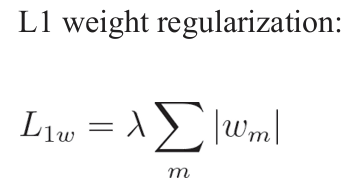
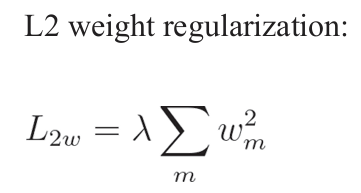

- The loss function sums the data loss and the regularization loss
- L1 and L2 loss can be both used at same time, or just L2. L1 is usually never used by itself

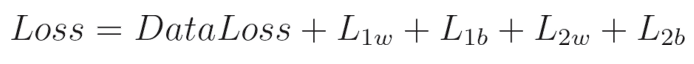

In [144]:
import numpy as np

lambda_L1w = 0.1
lambda_L1b = 0.1
lambda_L2w = 0.1
lambda_L2b = 0.1

weights = np.array([2, 3, 4, 3, 1, 5])
biases = np.array([1, 3, 2])

data_loss = 5.0

L1w = lambda_L1w * sum(abs(weights))
L1b = lambda_L1b * sum(abs(biases))
L2w = lambda_L2w * sum(weights ** 2)
L2b = lambda_L2b * sum(biases ** 2)

loss = data_loss + L1w + L1b + L2w + L2b
print(loss)

15.200000000000001


### L1 L2 Regularization Backward Pass
- Regularization must also be accounted for in the backpropagation of the gradients

- L2 derivative is simple

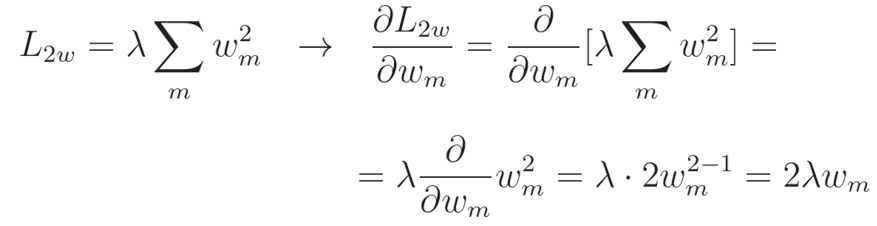

- L1 derivative depends on the signage of the weight/bias

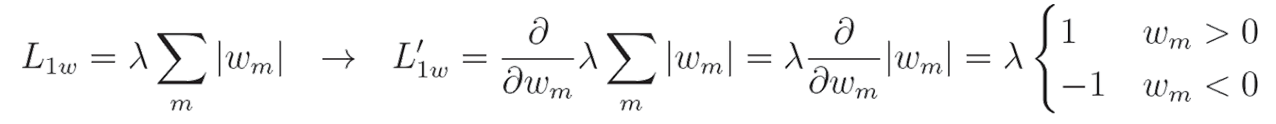

In [145]:
weights = [0.2, 0.8, -0.5]
dL1 = []
for weight in weights:
    if weight >= 0:
        dL1.append(1)
    else:
        dL1.append(-1)

# or for multiple neurons in layer, 3 sets of weights and 3 neurons
weights = [[0.2, 0.8, -0.5, 1],  
           [0.5, -0.91, 0.26, -0.5], 
           [-0.26, -0.27, 0.17, 0.87]]
dL1 = []
for neuron in weights:
    neuron_dL1 = []
    for weight in neuron:
        if weight >= 0:
            neuron_dL1.append(1)
        else:
            neuron_dL1.append(-1)
    dL1.append(neuron_dL1)
print(dL1)

[[1, 1, -1, 1], [1, -1, 1, -1], [-1, -1, 1, 1]]


In [146]:
# for numpy arrays can use binary masks to do quicker setting of -1 whenever weights < 0
import numpy as np
weights = np.array([[0.2, 0.8, -0.5, 1],  
           [0.5, -0.91, 0.26, -0.5], 
           [-0.26, -0.27, 0.17, 0.87]])

dL1 = np.ones_like(weights)
dL1[weights < 0] = -1
print(dL1) 

[[ 1.  1. -1.  1.]
 [ 1. -1.  1. -1.]
 [-1. -1.  1.  1.]]


- After calculating the dweights from the partial derivative of data loss wrt weights/biases, add the derivatives of the regularization loss wrt weights/biases
- Regularization is usually only applied for the hidden layers
- Regularization helps with making larger networks without the fear of overfitting

## Dropout
- Another method of regularization to prevent overfitting is adding a **dropout layer** to the network
- This layer, for each forward pass, disables a random selection of neurons (set to zero) while others pass through unchanged 
- This prevents a network from becoming too dependent on any neuron, helping to reduce overfitting
- Also helps prevent **co-adoption**, which is when neurons are dependent on the output values of previou neurons rather than learning the underlying function
- For instance, in one step disable one half of neurons, and other step disable the other half, forces more neurons to learn the data

### Dropout Forward Pass
- An array with the same shape as the layer output but filled with numbers drawn from **Bernoulli distribution**, which is probability distribution where can get a value of 1 with probability $p$ or value 0 with probability $q=1-p$
- The $p$ is the hyperparameter we can tweak depending how many neurons we want to deactivate
- Return an array filled with values of 1 with probability $p$, and multiply the layer outputs by this array filter. 

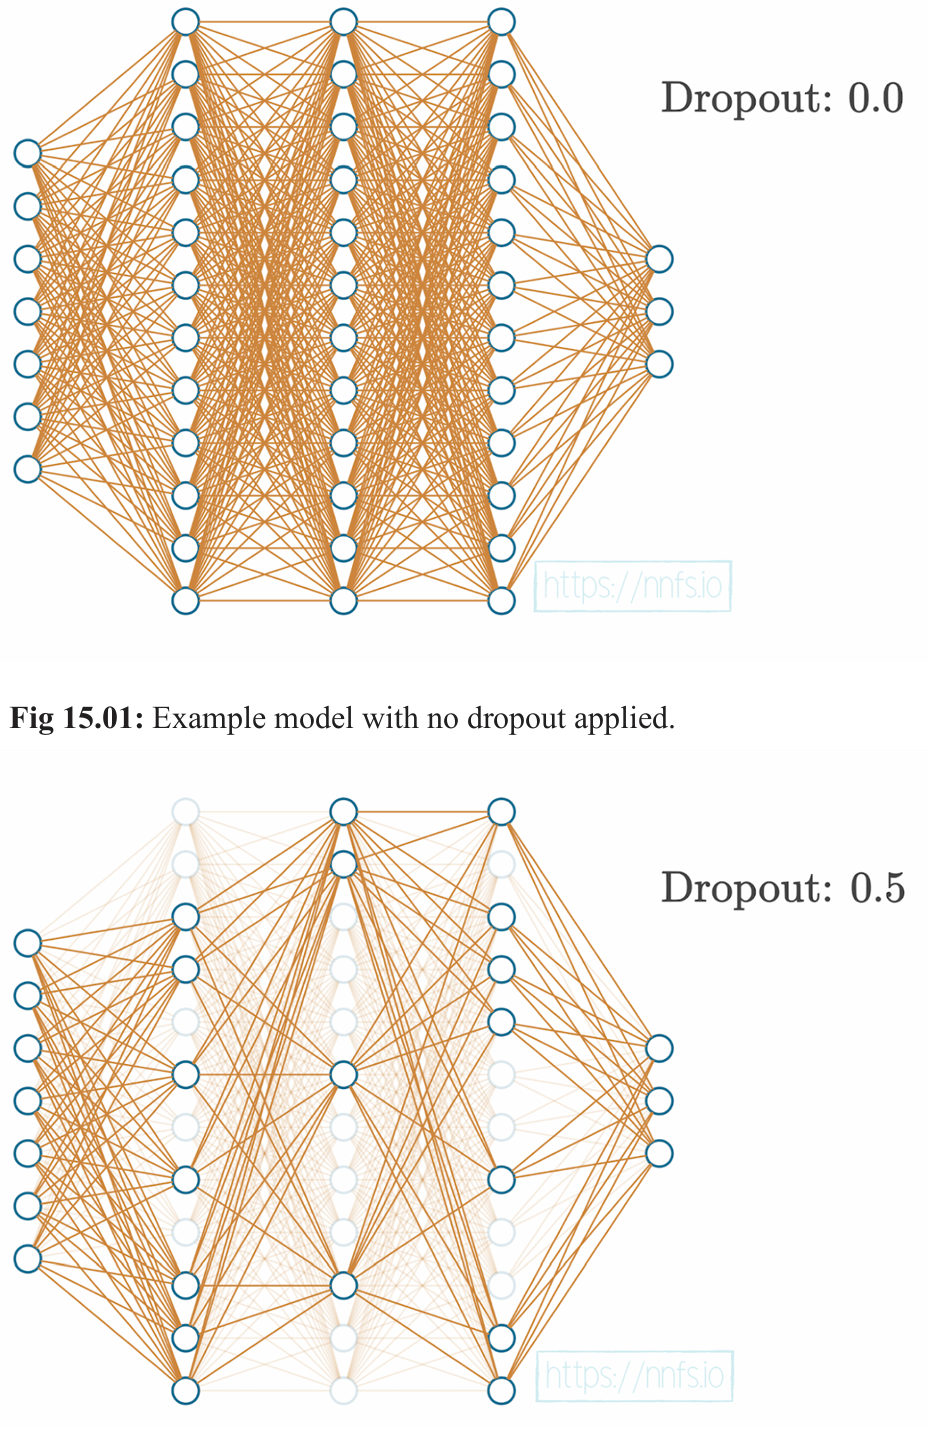



In [147]:
import random

dropout_rate = 0.5
example_output = [0.27, -1.03, 0.67, 0.99, 0.05, -0.37, -2.01, 1.13, -0.07, 0.73] 

while True:
    # randomly choose an index in example_output and set its value to 0
    index = random.randint(0, len(example_output)-1)
    example_output[index] = 0

    # check how many values were set to zero, since we could have 
    # set an index that was already zeroed
    dropped_out = 0
    for value in example_output:
        if value == 0:
            dropped_out += 1
    # stop the loop once the ratio of dropped neurons to total neurons exceeds the dropout rate
    if dropped_out / len(example_output) >= dropout_rate:
        break

print(example_output)

[0.27, 0, 0.67, 0, 0, -0.37, -2.01, 0, -0.07, 0]


- Instead can be implemented using numpy random binomial function, which takes parameter $n$ for number of experiments, $p$ as probability experiment returns true, and a size parameter for number of tests of $n$ experiments to run
- Like coin toss, where result is 0 or 1. $n$ is how many tosses of coin to do. $p$ is probability toss results in 1. Overall result is the sum of all the toss results. Size is how many of the tests of $n$ coin flips to run, which results in an array of overall results


In [148]:
import numpy as np
print(np.random.binomial(2, 0.5, size=10))


[1 1 2 2 1 1 1 1 2 1]


- In our case, we want to do one coin flip $n=1$. We want the probability that the coin flip returns 1 as $1-droputrate$, since dropoutrate tells the fraction that are zero. And the size to be the number of outputs of the layer

In [149]:
example_output = np.array([0.27, -1.03, 0.67, 0.99, 0.05, 
                           -0.37, -2.01, 1.13, -0.07, 0.73])  
dropout_rate = 0.2
example_output *= np.random.binomial(1, 1-dropout_rate, size=example_output.shape)
print(example_output)

[ 0.27 -0.    0.67  0.99  0.05 -0.37 -0.    1.13 -0.    0.73]


- Some libraries have the dropout rate represented as the ratio of neurons we want to disable $q$, and others have it as ratio of neurons we want to keep $p$
- TensorFlow and Keras have the dropout parameter as $q$
- PyTorch has it as $p$

- Dropout isn't something we should implement in the prediction, only in training
- But we can't simply remove the layer during prediction since it will alter the magnitudes of outputs of the layer. For instance if during training the dropout is 50%, and during prediction the dropout is just removed, then the magnitude of the output of the layer will be double what the network expected during training
- A way to bypass this is to scale the data back up after dropout **during training** to mimic the mean of the sum when all neurons are active. This way we can just omit the dropout layer during prediction
- Divide the dropout mask by $1-q$

In [150]:
example_output *= np.random.binomial(1, 1-dropout_rate, example_output.shape) / (1-dropout_rate)

### Backward Pass
- Need to calculate partial derivative of the dropout operation
- The derivative is identical to the scaled dropout mask, so we can save the mask in forward pass and use it in chain rule for backward pass

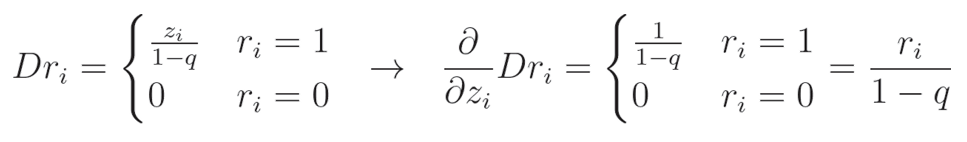

- In general we would expect the validation accuracy to be higher than training accuracy because validation would have full neurons firing